In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data processing/reduced_dataset.csv')

In [4]:
X = df.drop('RainTomorrow', axis=1);

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
cluster_labels = model.fit_predict(X)

In [9]:
cluster_labels

array([2, 2, 2, ..., 0, 0, 1])

In [10]:
X['Cluster'] = cluster_labels
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Cluster
0,0.749989,1.230099,-2.093426,-0.298704,0.536319,0.481063,-1.064279,0.217299,-1.220448,-1.194645,1.970566,-0.312113,-0.065709,2
1,1.007009,-0.052832,-2.698468,-1.253686,0.384879,0.264372,-1.472700,-0.093843,-0.826070,-0.979376,1.495448,0.800856,0.987330,2
2,1.614931,1.042818,-1.918554,0.034041,-0.769160,0.998345,-1.182415,-0.221554,-1.643123,-0.345244,1.611492,-0.095412,0.692029,2
3,2.346759,-2.545315,0.220300,0.442592,0.807228,1.385255,-2.293140,0.289938,1.331965,1.334661,-0.895851,-0.577264,0.752065,0
4,1.170310,1.643348,-0.231587,-1.855438,-0.417431,2.028205,-1.078809,-0.647345,-0.709093,-0.462753,-0.012471,-0.994412,-1.481143,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083345,-3.717788,0.178347,1.472794,1.058897,1.243298,0.465545,1.173320,-1.592043,0.183161,0.240572,0.156753,0.381497,1
145456,0.017594,-2.530976,-1.493767,-0.974144,0.510472,2.001109,0.665878,-0.344729,1.313493,-2.063659,-0.013646,-1.574120,-0.178437,1
145457,0.724006,-2.186203,-1.345398,-0.704922,0.761860,1.646034,0.585660,0.136316,0.549115,-1.498885,1.335171,-1.344210,-0.173701,0
145458,1.138285,-2.773773,-0.737175,-0.401409,1.367802,1.104264,0.423048,0.634580,-0.788424,-1.277074,-0.189990,-0.625883,-0.236861,0


In [12]:
X['Cluster'].value_counts()

Cluster
1    36428
4    32001
3    28378
0    24864
2    23789
Name: count, dtype: int64

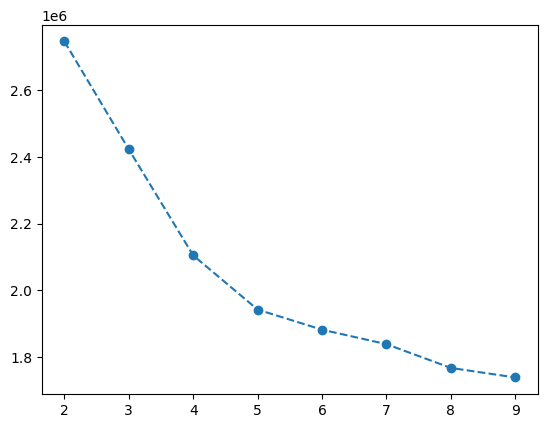

In [13]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)

    ssd.append(model.inertia_)

plt.plot(range(2, 10), ssd, 'o--')

In [15]:
X['RainTomorrow'] = df['RainTomorrow']
X.to_csv('../../data processing/pca_with_clusters.csv', index=False)